In [1]:
suppressMessages(library(tidyverse))
suppressMessages(library(ggplot2))

suppressMessages(library(openair))

In [2]:
suppressMessages(library(doMC))
registerDoMC(cores=as.integer(detectCores()*0.75))

In [3]:
suppressMessages(library(repr))
options(repr.plot.width=25,
        repr.plot.height=10,
        #repr.plot.pointsize=50,
        repr.plot.family='serif'
       )

In [4]:
setwd("~/Repositories/AirQualityCOVID/")

In [5]:
method <- "lm"

load(paste("data/Cross-validation/cross_val/", method, ".rda", sep=""))

# Metricas

In [6]:
pivot.metrics <- cross.val$metrics %>%
        pivot_longer(cols = 7:ncol(cross.val$metrics),
                     names_to = "Error", values_to = "Err.Val")

In [7]:
dat.df <- pivot.metrics %>%
            filter(
                days %in% 0:3,
                site %in% c(
                            "es0118a", "es1438a", 
                            "es1625a", "es0890a", 
                            "es1047a", "es1137a",
                            "es1632a", "es0110a",
                            "es1580a", "es1340a"
                            ),
                variable %in% c(
                                #"no", 
                                "no2", 
                                "o3", 
                                "pm10", 
                                "pm2.5"
                                ),
                year %in% 2013:2019,
                param %in% c(0,
                             # k-NN
                             1:10,
                             # randomForest
                             10, 20, 30, 50, 100, 150, 200),
                qq.Mapping %in% c(
                                  "Yes"
                                  #"No"
                                  ),
                Error %in% c(
                             "Bias", 
                             "cor1", 
                             "cor2", 
                             "var.ratio", 
                             "RMSE"
                             )
            )

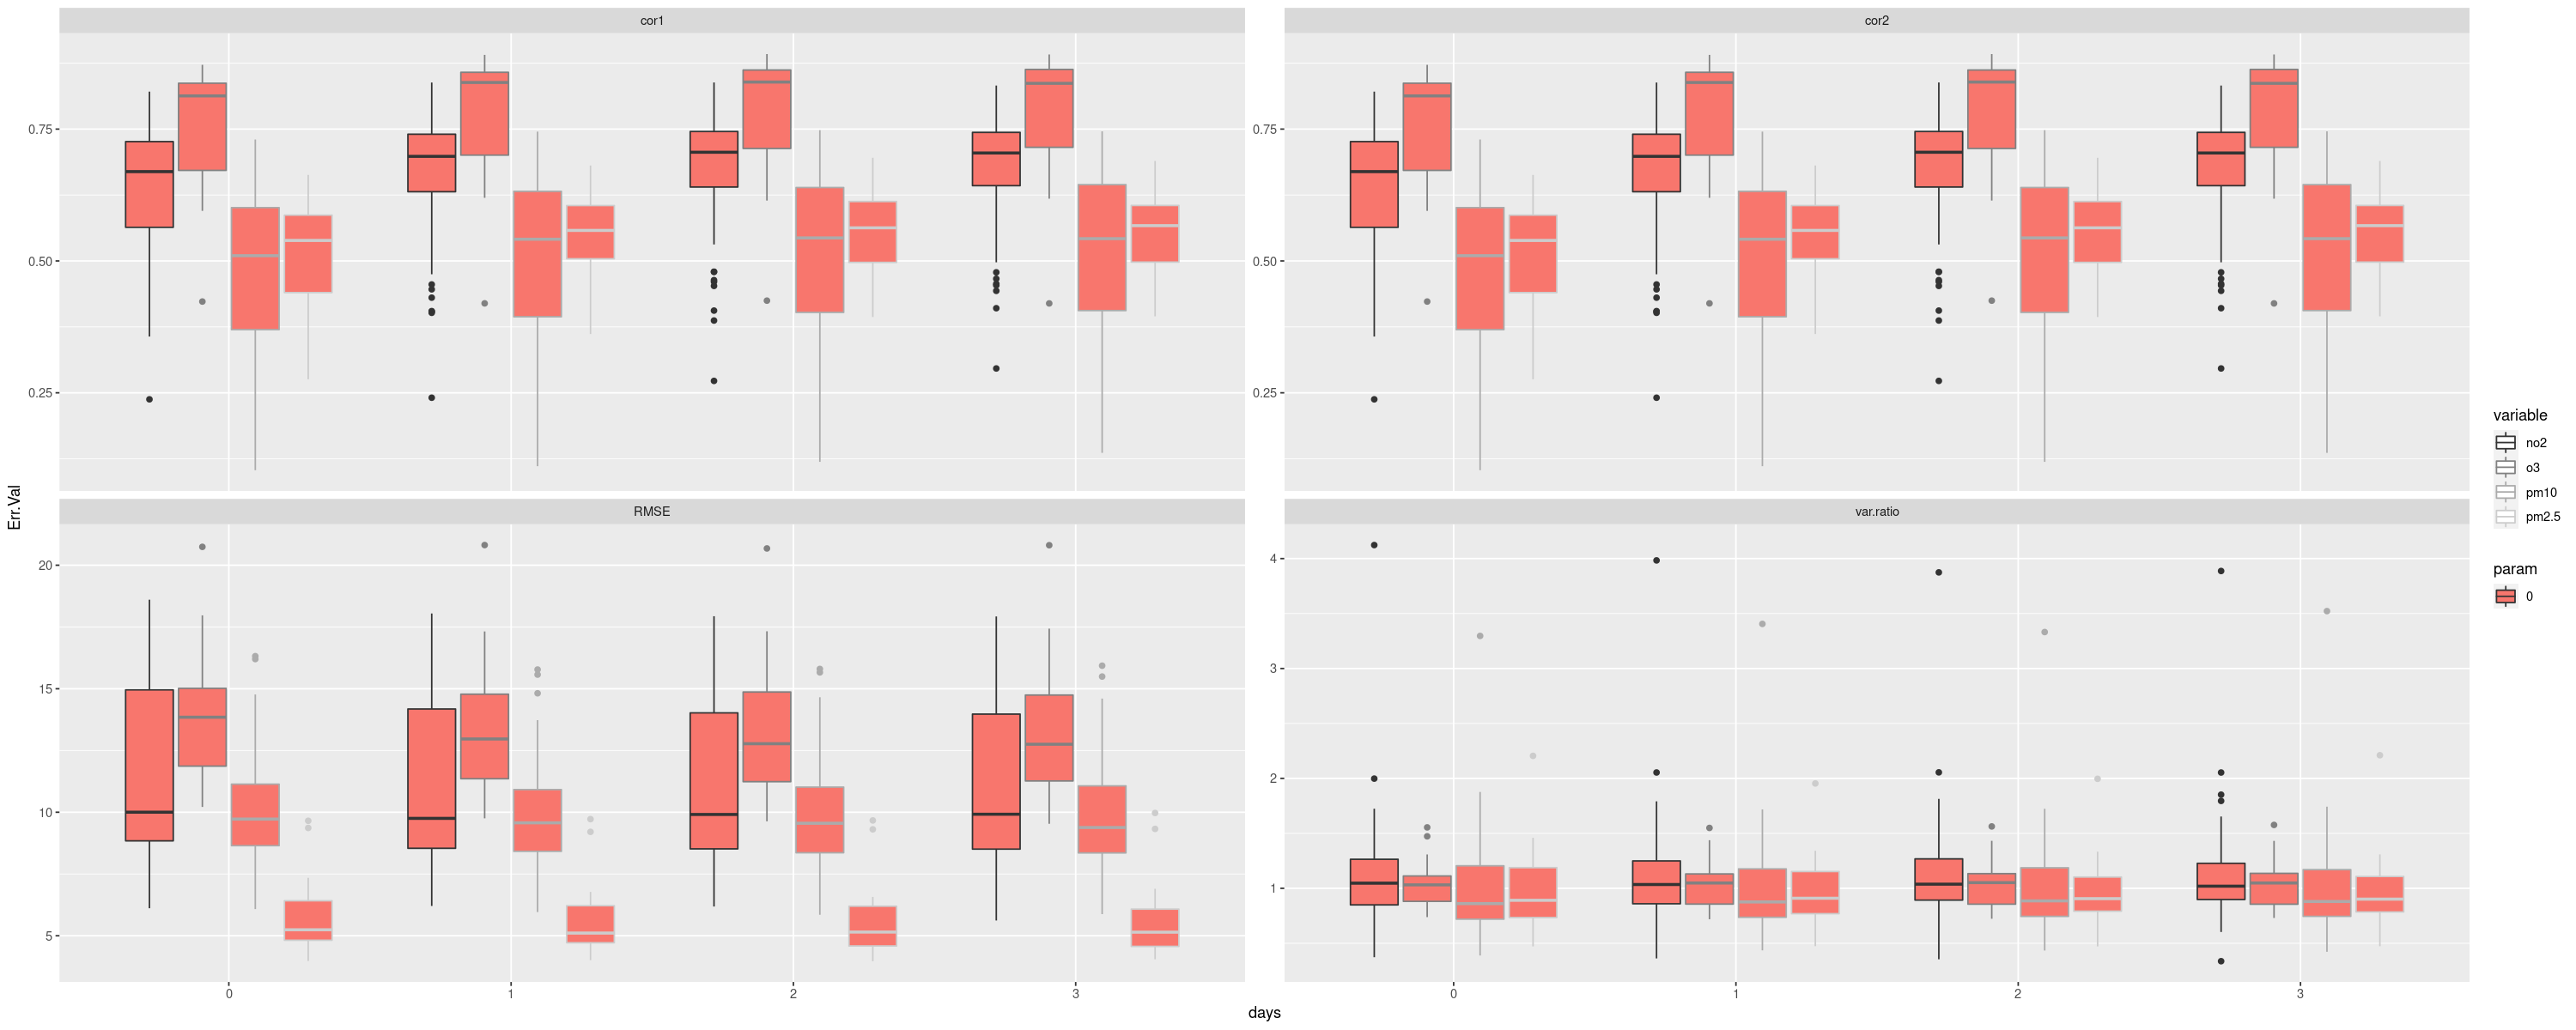

In [8]:
ggplot(data=dat.df) +
    geom_boxplot(aes(x=days, y=Err.Val, fill=param, color=variable)) +
    scale_color_grey() +
    facet_wrap(~Error,scale="free_y")

# Predicciones

In [27]:
predict.df <- cross.val$predictions %>%
            filter(
                days %in% 0:3,
                site %in% c(
                            "es0118a" #"es1438a", 
                            #"es1625a", "es0890a", 
                            #"es1047a", "es1137a",
                            #"es1632a", "es0110a",
                            #"es1580a", "es1340a"
                            ),
                variable %in% c(
                                "no", 
                                "no2", 
                                "o3", 
                                "pm10",
                                "pm2.5"
                                ),
                year %in% 2013:2019,
                param %in% c(0, #10,
                             # k-NN
                             4:5,
                             # randomForest
                             20, 30, 50, 100, 150, 200)
            )

```R
ggplot(data=predict.df) +
        #geom_point(aes(x=obs, y=pred), color = "red") +
        geom_point(aes(x=obs, y=pred.qq, color = param)) +
        geom_line(aes(x=obs, y=obs), color = "black") +
        facet_wrap(~variable, scale="free")
```

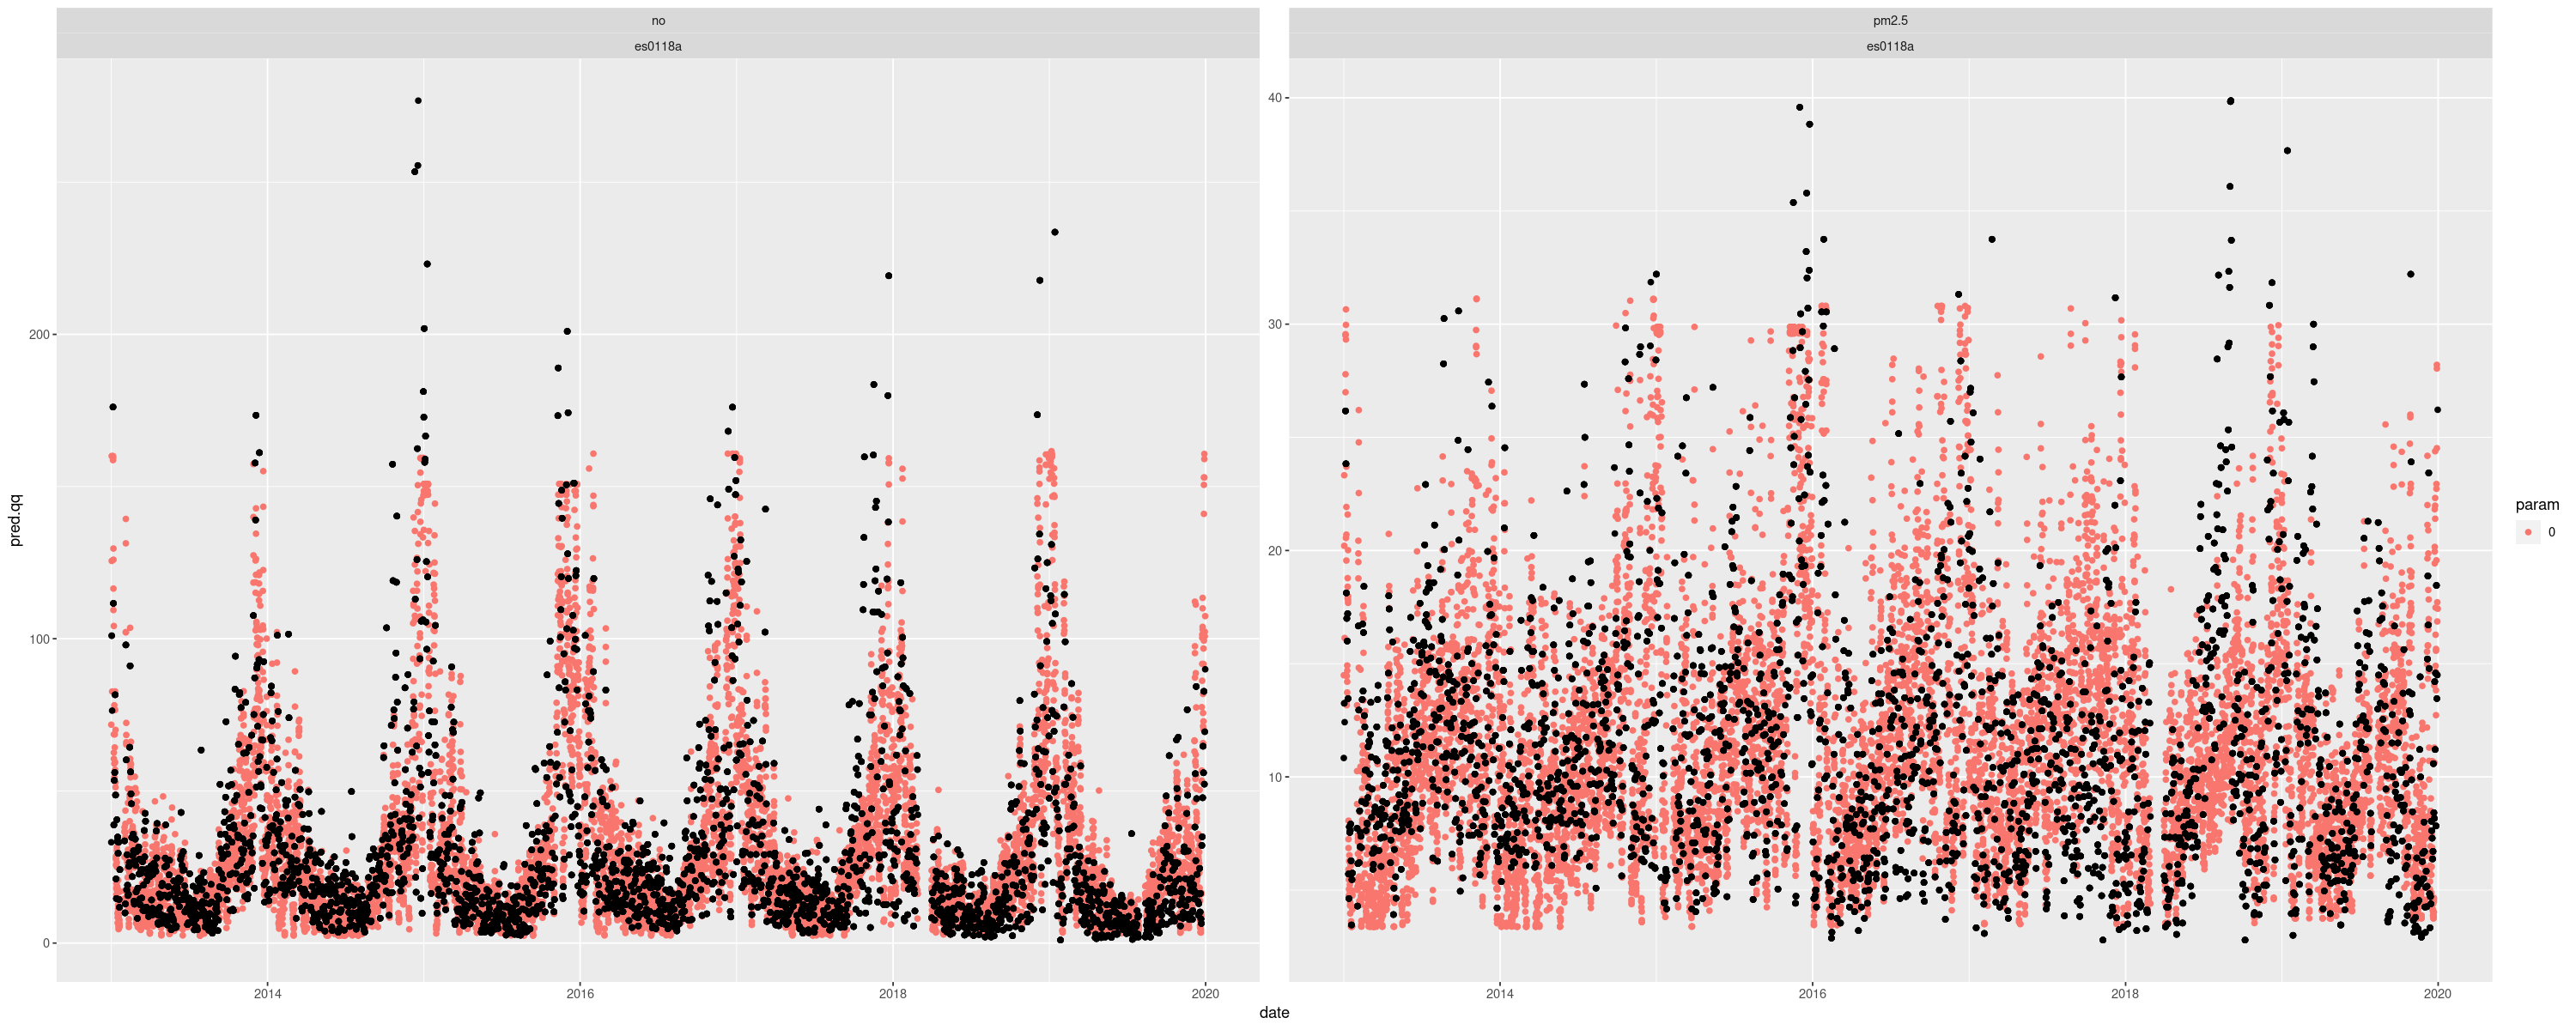

In [23]:
ggplot(data=predict.df) +
    geom_point(aes(x=date, y=pred.qq, color = param)) +
    geom_point(aes(x=date, y=obs), color = "black") +
    facet_wrap(~variable+site, scale="free", ncol=4)

In [24]:
test <- predict.df %>%
            rename(value = pred.qq) %>%
            timeAverage(avg.time = "2 week", 
                        type = c("days", "site", "variable", "param"))

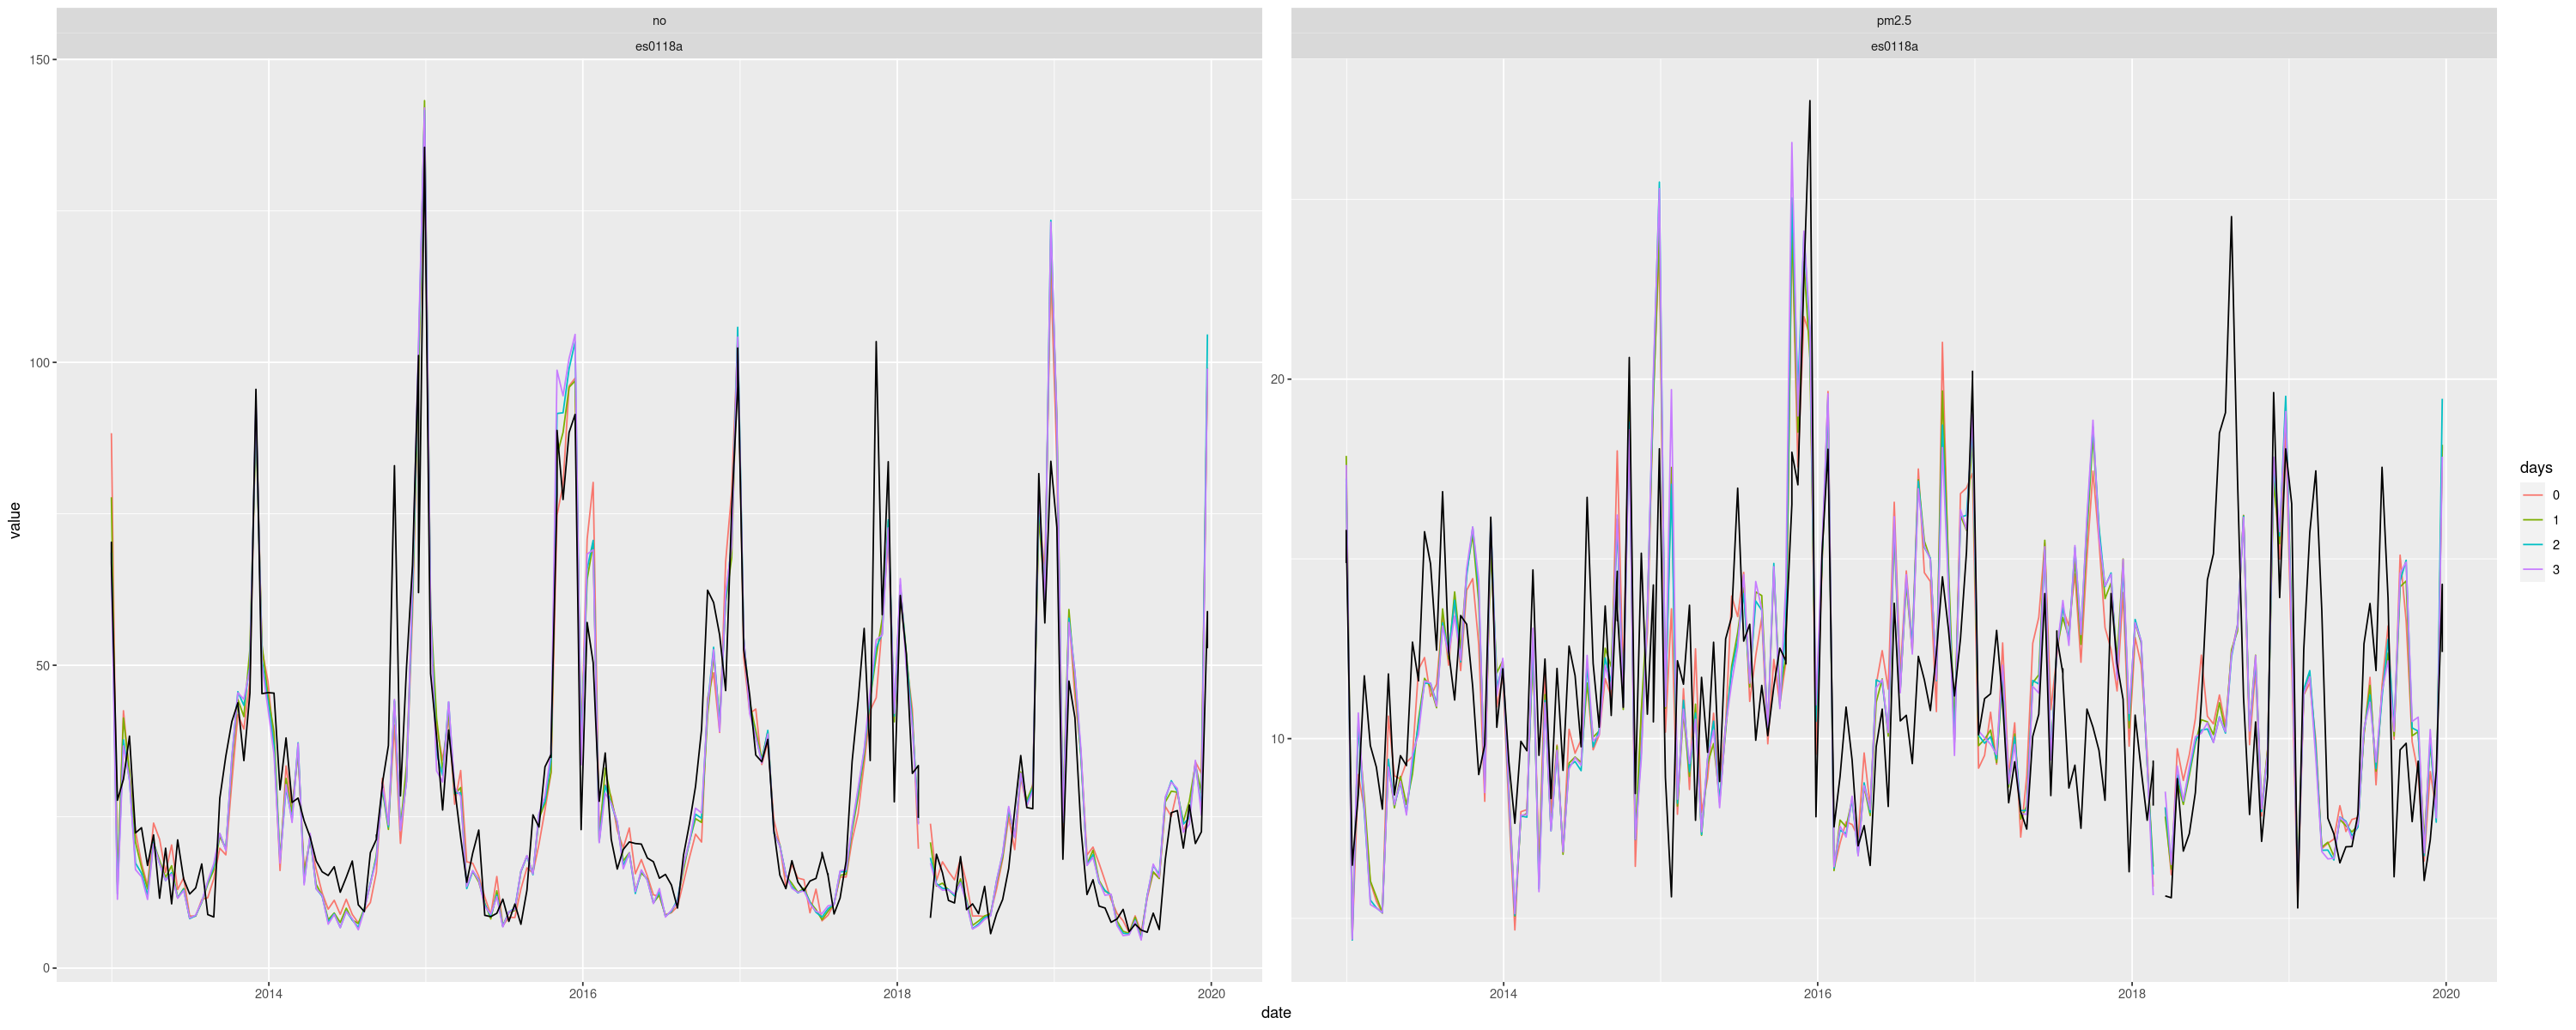

In [25]:
ggplot(data=test) +
    geom_line(aes(x=date, y=value, color = days)) +
    geom_line(aes(x=date, y=obs), color = "black") +
    facet_wrap(~variable+site, scale="free", ncol=4)

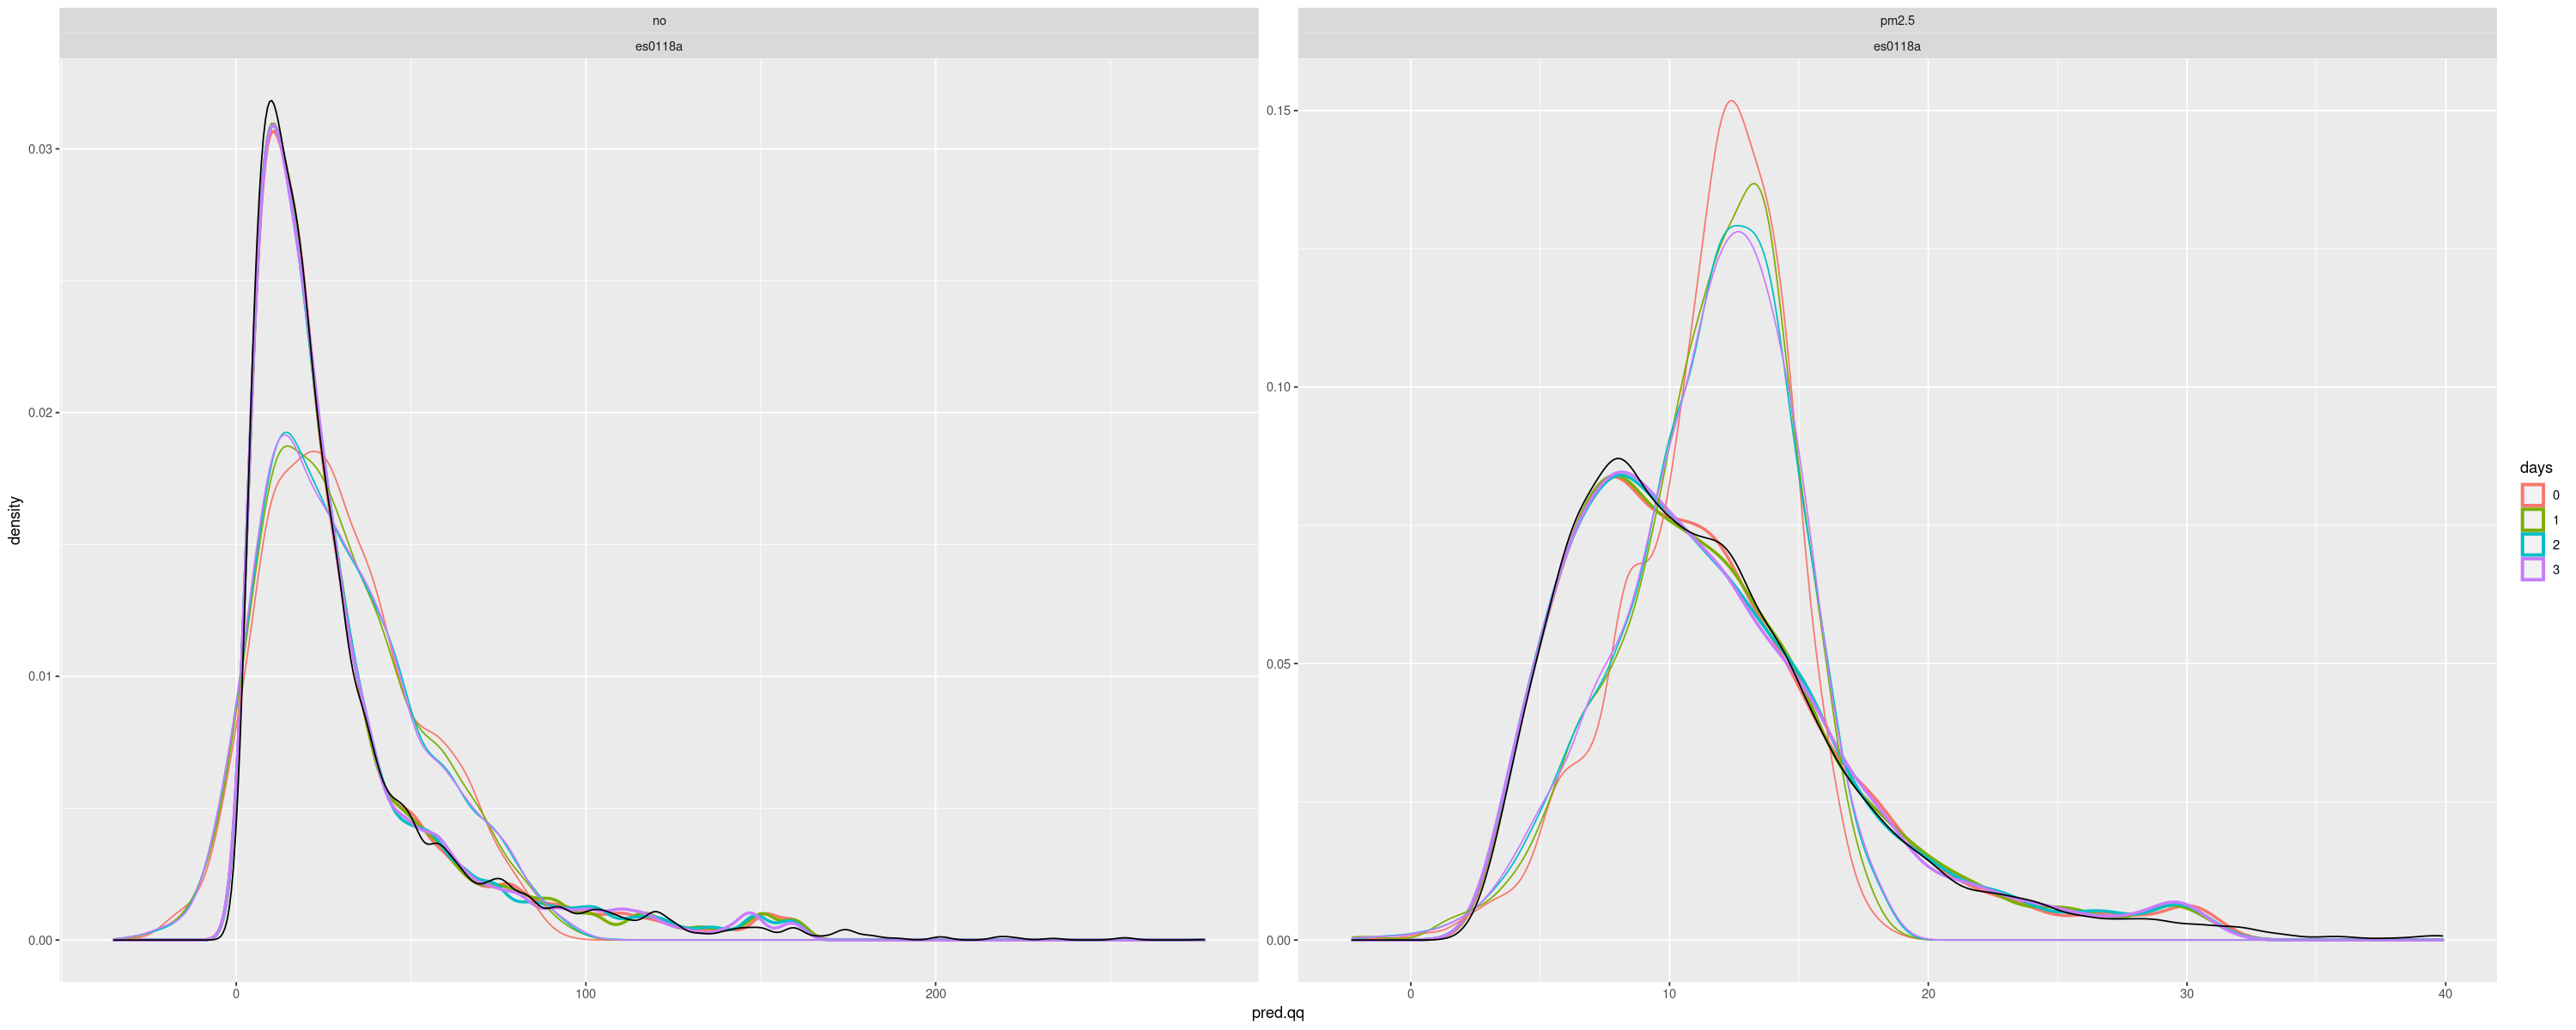

In [26]:
ggplot(data=predict.df) +
    geom_density(aes(x=pred.qq, color=days), size=1) +
    geom_density(aes(x=pred, color=days), size=0.5) +
    geom_density(aes(x=obs), color="black") +
    facet_wrap(~variable+site, scale="free")

```R
ggsave(plot = last_plot(), 
           filename = "prueba_%03d.png",
           device = "png", 
           path = "~/Desktop/pruebas",
           width = 15,
           height = 10,
          )
```